In [1]:
import pandas as pd
from wordcloud import WordCloud
import datetime as dt
import re

import emoji

from collections import defaultdict

import nltk
from nltk.corpus import stopwords

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from io import BytesIO
import base64

In [2]:
dict_replace = {"Ravindra Bhandarkar🐼" : "Ravindra" , 'Nagraj Infy':"Nagaraj", 'Sughosh Sp Nitte':"Sughosh",\
     'Nishant Shenoy Nitte':"Nishant", 'Bhuvan Reddy' : "Bhuvan", 'Raymond Pinto':"Raymond", 'Kavan Mandappa':"Mandappa",\
    'Sharath New':"Sharath", 'Adarsha Viper':"Adarsh", 'Manoj Gaonkar':"Manoj", 'Jeevan M H':"Jeevan", 'H J Bhargav':"Bhargav",\
    'Saiprakash Nitte' : "Sai Prakash", 'Shrinay Nitte':"Shrinay", 'Prasanna Hostel':"Prasanna", 'Prajwal Tantry':"Tantry",\
     'Pradeep Section':"Pradeep", 'Maneesh Dali Vada':"Maneesh", 'Shravan Star Player':"Shravan", 'Jason Spice' : "Jason",\
     'Datta Sec':"Datta", 'Vaishnav Infy':"Vaishnav", 'Shekhar nitte':"Shekhar", ". n Sai Prakash":"Sai Prakash",\
    ". n Bhuvan":"Bhuvan", ". n Shrinay" :"Shrinay", ". n Shravan":"Shravan",". n Raymond":"Raymond",". n Bharghav":"Bhargav",\
     ". n Mandappa":"Mandappa", ". n Tantry":"Tantry",". n Adarsh":"Adarsh",". n Sharath":"Sharath",". n Datta":"Datta",\
      ". n Sughosh":"Sughosh", ". n Prasanna":"Prasanna",". n Maneesh":"Maneesh", ". i Nagaraj":"Nagaraj",\
      "Mazeen Muhammed":"Mazeen",". i Vaishnav":"Vaishnav", ". n Shekhar":"Shekhar",". n Jeevan":"Jeevan",\
     ". n Pradeep":"Pradeep",". n Nishant":"Nishant",". n Ravindra":"Ravindra",". n Manoj":"Manoj"}

parsedData = []
    
iphone_pattern = "^((\[)([0-2][0-9]|[3][0-1])\/([0][1-9]|[1][0-2])(\/)([0-2][0-9]), (([0-9]:[0-5][0-9]:[0-5][0-9]) (AM|PM)|([1][0-2]:[0-5][0-9]:[0-5][0-9]) (AM|PM))(\])) ([\U0001F1E0-\U0001F1FF\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U00002639 \w ./+=#$\]\[@!^()&%\-*{}\"';><,/?`~]*): "


iphone_left_pattern = "^((\[)([0-2][0-9]|[3][0-1])\/([0][1-9]|[1][0-2])(\/)([0-2][0-9]), (([0-9]:[0-5][0-9]:[0-5][0-9]) (AM|PM)|([1][0-2]:[0-5][0-9]:[0-5][0-9]) (AM|PM))(\])) ([\U0001F1E0-\U0001F1FF\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U00002639 \w ./+=#$\]\[@!^()&%\-*{}\"';><,/?`~]*)left$"


iphone_subject_pattern = "^((\[)([0-2][0-9]|[3][0-1])\/([0][1-9]|[1][0-2])(\/)([0-2][0-9]), (([0-9]:[0-5][0-9]:[0-5][0-9]) (AM|PM)|([1][0-2]:[0-5][0-9]:[0-5][0-9]) (AM|PM))(\])) ([\U0001F1E0-\U0001F1FF\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U00002639 \w ./+=#$\]\[@!^()&%-*{}\"';><,/?`~]*)changed the subject to ([\U0001F1E0-\U0001F1FF\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U00002639 \w ./+=#$\]\[@!^:()&%\-*{}\"';><,/?`~]*)"


iphone_icon_pattern = "^((\[)([0-2][0-9]|[3][0-1])\/([0][1-9]|[1][0-2])(\/)([0-2][0-9]), (([0-9]:[0-5][0-9]:[0-5][0-9]) (AM|PM)|([1][0-2]:[0-5][0-9]:[0-5][0-9]) (AM|PM))(\])) ([\U0001F1E0-\U0001F1FF\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U00002639 \w ./+=#$\]\[@!^()&%-*{}\"';><,/?`~]*)(changed this group's icon)$"


iphone_added_pattern = "^((\[)([0-2][0-9]|[3][0-1])\/([0][1-9]|[1][0-2])(\/)([0-2][0-9]), (([0-9]:[0-5][0-9]:[0-5][0-9]) (AM|PM)|([1][0-2]:[0-5][0-9]:[0-5][0-9]) (AM|PM))(\])) ([\U0001F1E0-\U0001F1FF\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U00002639 \w ./+=#$\]\[@!^()&%-*{}\"';><,/?`~]*)added([\U0001F1E0-\U0001F1FF\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U00002639 \w ./+=#$\]\[@!^:()&%\-*{}\"';><,/?`~]*)"


iphone_removed_pattern = "^((\[)([0-2][0-9]|[3][0-1])\/([0][1-9]|[1][0-2])(\/)([0-2][0-9]), (([0-9]:[0-5][0-9]:[0-5][0-9]) (AM|PM)|([1][0-2]:[0-5][0-9]:[0-5][0-9]) (AM|PM))(\])) ([\U0001F1E0-\U0001F1FF\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U00002639 \w ./+=#$\]\[@!^()&%-*{}\"';><,/?`~]*)removed([\U0001F1E0-\U0001F1FF\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U00002639 \w ./+=#$\]\[@!^:()&%\-*{}\"';><,/?`~]*)"


iphone_anything_else_pattern = "^((\[)([0-2][0-9]|[3][0-1])\/([0][1-9]|[1][0-2])(\/)([0-2][0-9]), (([0-9]:[0-5][0-9]:[0-5][0-9]) (AM|PM)|([1][0-2]:[0-5][0-9]:[0-5][0-9]) (AM|PM))(\])) "


pattern = "^(([0-2][0-9])|([3][0-1]))(\/)(([0][1-9])|([1][0-2]))(\/)([0-2][0-9]), (([0-9])|([1][0-2])):(([0][0-9])|([1-5][0-9])) (am|pm) - ([\U0001F1E0-\U0001F1FF\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U00002639 \w ./+=#$\]\[@!^()&%\-*{}\"';><,/?`~]*): "

left_pattern = "^(([0-2][0-9])|([3][0-1]))(\/)(([0][1-9])|([1][0-2]))(\/)([0-2][0-9]), (([0-9])|([1][0-2])):(([0][0-9])|([1-5][0-9])) (am|pm) - ([\U0001F1E0-\U0001F1FF\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U00002639 \w ./+=#$\]\[@!^()&%\-*{}\"';><,/?`~]*)left$"
left = []

icon_pattern = "^(([0-2][0-9])|([3][0-1]))(\/)(([0][1-9])|([1][0-2]))(\/)([0-2][0-9]), (([0-9])|([1][0-2])):(([0][0-9])|([1-5][0-9])) (am|pm) - ([\U0001F1E0-\U0001F1FF\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U00002639 \w ./+=#$\]\[@!^()&%\-*{}\"';><,/?`~]*)(changed this group's icon)$"
icon = []

subject_pattern = "^(([0-2][0-9])|([3][0-1]))(\/)(([0][1-9])|([1][0-2]))(\/)([0-2][0-9]), (([0-9])|([1][0-2])):(([0][0-9])|([1-5][0-9])) (am|pm) - ([\U0001F1E0-\U0001F1FF\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U00002639 \w ./+=#$\]\[@!^()&%-*{}\"';><,/?`~]*)changed the subject from ([\U0001F1E0-\U0001F1FF\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U00002639 \w ./+=#$\]\[@!^:()&%\-*{}\"';><,/?`~]*) to ([\U0001F1E0-\U0001F1FF\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U00002639 \w ./+=#$\]\[@!^:()&%\-*{}\"';><,/?`~]*)"
subject = []

added_pattern = "^(([0-2][0-9])|([3][0-1]))(\/)(([0][1-9])|([1][0-2]))(\/)([0-2][0-9]), (([0-9])|([1][0-2])):(([0][0-9])|([1-5][0-9])) (am|pm) - ([\U0001F1E0-\U0001F1FF\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U00002639 \w ./+=#$\]\[@!^()&%\-*{}\"';><,/?`~]*) added ([\U0001F1E0-\U0001F1FF\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U00002639 \w ./+=#$\]\[@!^()&%\-*{}\"';><,/?`~]*)"
added = []

removed_pattern  = "^(([0-2][0-9])|([3][0-1]))(\/)(([0][1-9])|([1][0-2]))(\/)([0-2][0-9]), (([0-9])|([1][0-2])):(([0][0-9])|([1-5][0-9])) (am|pm) - ([\U0001F1E0-\U0001F1FF\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U00002639 \w ./+=#$\]\[@!^()&%\-*{}\"';><,/?`~]*) removed ([\U0001F1E0-\U0001F1FF\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U00002639 \w ./+=#$\]\[@!^()&%\-*{}\"';><,/?`~]*)"
removed = []

anything_else_pattern = "^(([0-2][0-9])|([3][0-1]))(\/)(([0][1-9])|([1][0-2]))(\/)([0-2][0-9]), (([0-9])|([1][0-2])):(([0][0-9])|([1-5][0-9])) (am|pm) - "
anything_else = []
diff = []

with open(r"C:\Users\Mazeen\Desktop\Jupyter\Whatsapp Project\chat_folder\IphoneManaliGroup.txt" , encoding="utf-8") as fp:
    data = fp.readlines()
    if data[0].replace('\u200e','').strip('\n').startswith('['):
       
        for x in data[-len(data)+3:]:
            x = x.replace('\u200e','').strip('\n')
            if re.match(iphone_left_pattern,x):
                name = x.split(']')[1].strip("left").strip()
                left.append(name)
            elif re.match(iphone_subject_pattern,x):
                name = x.split("changed the subject to")[0].split(']')[1].strip().replace('You','Ravindra Bhandarkar🐼')
                subject.append(name)
            elif re.match(iphone_icon_pattern,x):
                name = x.split("changed this group's icon")[0].split(']')[1].strip().replace('You','Ravindra Bhandarkar🐼')
                icon.append(name)
            elif re.match(iphone_added_pattern,x):
                added.append(x)
            elif re.match(iphone_removed_pattern,x):
                removed.append(x)
            elif re.match(iphone_pattern,x):
                parsedData.append(x)
            elif not re.match(iphone_anything_else_pattern,x):
                parsedData[-1] = parsedData[-1]+' '+x
            else:
                diff.append(x)
        final_list= []    
        for i in parsedData:
            split = i.strip().split("] ",1)
            Date = split[0].strip('[')
            Author, Message = split[1].split(':',1)
            final_list.append([dt.datetime.strptime(Date.replace(",",""), "%d/%m/%y %I:%M:%S %p"),Author.strip(), Message.strip()]) 

    else:
        for x in data[-len(data)+3:]:
            x = x.replace('\u200e','').strip('\n')
            if re.match(left_pattern,x):
                name = x.split('-')[1].strip("left").strip()
                left.append(name)
            elif re.match(subject_pattern,x):
                name = x.split("changed the subject from")[0].split('-')[1].strip().replace('You','Mazeen Muhammed')
                subject.append(name)
            elif re.match(icon_pattern,x):
                name = x.split("changed this group's icon")[0].split('-')[1].strip().replace('You','Mazeen Muhammed')
                icon.append(name)
            elif re.match(added_pattern,x):
                added.append(x)
            elif re.match(removed_pattern,x):
                removed.append(x)
            elif re.match(pattern,x):
                parsedData.append(x)
            elif not re.match(anything_else_pattern,x):
                parsedData[-1] = parsedData[-1]+' '+x
            else:
                diff.append(x)
        final_list= []    
        for i in parsedData:
            Date,auth_msg = i.strip().split(' - ',1)
            Author, Message = auth_msg.split(":",1)
            final_list.append([dt.datetime.strptime(Date.replace(",",""), "%d/%m/%y %I:%M %p"),Author, Message]) 

data_frame=pd.DataFrame(final_list , columns=["Date","Author","Message"]).dropna()
data_frame['Year'] = data_frame.Date.map(lambda x: x.year)
data_frame['Month'] = data_frame.Date.map(lambda x: x.month)
data_frame['Month_Name'] = data_frame.Date.map(lambda x: x.month_name())
data_frame['Day'] = data_frame.Date.map(lambda x: x.day)
data_frame['Day_Number'] = data_frame.Date.map(lambda x: x.isoweekday())
data_frame['Day_Of_Week'] = data_frame.Date.map(lambda x: x.day_name())
data_frame['Hour'] = data_frame.Date.map(lambda x: x.hour)
data_frame['Mins'] = data_frame.Date.map(lambda x: x.minute)
data_frame.Author.replace(dict_replace, inplace=True) ## remove this later
data_frame.dropna(inplace=True, axis=0)
            

total_file_lines = len(parsedData)+len(left)+len(subject)+len(icon)+len(diff)

print("Total Exits : {} \nTotal Subject Changes : {}\nTotal Icon Changes : {}\nTotal Messages : {}\n\
Total Length of file : {}".format(len(left),len(subject),len(icon),len(parsedData)+len(diff),total_file_lines))
print("You have data starting from {} to {}"\
      .format(str(data_frame.Day[0])+"_"+str(data_frame.Month_Name[0]+"_"+str(data_frame.Year[0])),\
              str(data_frame.Day[len(data_frame)-1])+"_"+str(data_frame.Month_Name[len(data_frame)-1])+"_"+str(data_frame.Year[len(data_frame)-1])))

Total Exits : 16 
Total Subject Changes : 600
Total Icon Changes : 242
Total Messages : 91129
Total Length of file : 91987
You have data starting from 20_June_2018 to 21_June_2020


## Overall Data Frame

In [3]:
data_frame.head(5)

Date    Author            Message  Year  Month Month_Name  \
0 2018-06-20 00:30:26    Mazeen      image omitted  2018      6       June   
1 2018-06-20 00:37:15  Ravindra               Haha  2018      6       June   
2 2018-06-20 00:42:20    Mazeen  Moine goime shoiw  2018      6       June   
3 2018-06-20 00:42:35  Ravindra      video omitted  2018      6       June   
4 2018-06-20 00:44:11   Nagaraj          Pardy boy  2018      6       June   

   Day  Day_Number Day_Of_Week  Hour  Mins  
0   20           3   Wednesday     0    30  
1   20           3   Wednesday     0    37  
2   20           3   Wednesday     0    42  
3   20           3   Wednesday     0    42  
4   20           3   Wednesday     0    44

## Top N Authors with highest messages

In [4]:
top_n = 5
messages_data_frame = data_frame.groupby('Author').count().iloc[:,1:2].rename(columns = {'Message':"Total_Messages"})
messages_data_frame.sort_values('Total_Messages', ascending = False).head(top_n)

Total_Messages
Author                  
Mazeen             15938
Ravindra           14915
Sughosh            11087
Nagaraj             9055
Nishant             6932

## Group Exits DataFrame

In [5]:
df_exits=pd.DataFrame(left).rename(columns={0:'Authors'}).replace(dict_replace)
df_exits = pd.DataFrame(df_exits.Authors.value_counts()).rename(columns={'Authors':'Left'})
df_exits.head(10)

Left
Bhargav     4
Mazeen      3
Shrinay     3
Nagaraj     2
Jeevan      2
Bhuvan      1
Sharath     1

## Group Icon Changes DataFrame

In [6]:
df_icon=pd.DataFrame(icon).rename(columns={0:'Authors'}).replace(dict_replace)
df_icon=pd.DataFrame(df_icon.value_counts()).rename(columns={0:'Icon'})
df_icon.reset_index(inplace=True)
df_icon.head(5)

Authors  Icon
0  Ravindra    84
1    Mazeen    53
2   Bhargav    18
3   Nagaraj    16
4   Sughosh    12

## Group Subject Changes DataFrame

In [7]:
df_subject=pd.DataFrame(subject).rename(columns={0:'Authors'}).replace(dict_replace)
df_subject = pd.DataFrame(df_subject.value_counts()).rename(columns={0:'Subject'})       
df_subject.reset_index(inplace=True)
df_subject.head(5)

Authors  Subject
0    Mazeen      143
1    Adarsh      102
2  Ravindra       80
3   Bhargav       59
4   Nagaraj       57

## Media DataFrame

In [8]:
df_with_media = data_frame[['Date','Author', 'Message']].copy()
df_with_media['Message'] = df_with_media.Message.map(lambda x : "Media is present" if ("<Media omitted>" in x) else "No Media")
#df_with_media.drop(df_with_media[df_with_media.Message=='No Media'], axis=1, inplace=True)
df_with_media = df_with_media[df_with_media.Message=='Media is present'].reset_index(drop=True)
df_with_media.dropna().head(5)

Empty DataFrame
Columns: [Date, Author, Message]
Index: []

## Top N Authors who send media 

In [9]:
medias_data_frame = df_with_media.groupby('Author').count().sort_index().iloc[:,1:2].rename(columns = {'Message':"Total_Medias"})
medias_data_frame.sort_values('Total_Medias', ascending = False).head(5)

Empty DataFrame
Columns: [Total_Medias]
Index: []

## Without Media DataFrame

In [10]:
df_without_media = data_frame[['Date','Author', 'Message']].copy()
df_without_media['Message'] = df_without_media.Message.map(lambda x : x if "<Media omitted>" not in x else None)
df_without_media = df_without_media.dropna().reset_index(drop=True)
df_without_media.head(5)

Date    Author            Message
0 2018-06-20 00:30:26    Mazeen      image omitted
1 2018-06-20 00:37:15  Ravindra               Haha
2 2018-06-20 00:42:20    Mazeen  Moine goime shoiw
3 2018-06-20 00:42:35  Ravindra      video omitted
4 2018-06-20 00:44:11   Nagaraj          Pardy boy

## Links DataFrame

In [11]:
ls_msg = df_without_media.Message.tolist()
ls_link = []
for msg in ls_msg:
    links = re.findall(r'(https?://\S+)', msg)
    for link in links:
        ls_link.append(re.findall ("^https?://([\w.]*)/",link))
link_df = pd.DataFrame(ls_link).replace({"youtu.be":"www.youtube.com", "instagram.com":"www.instagram.com"}).rename(columns={0:'Overall links sent in group'})
overall_link_df = pd.DataFrame(link_df.groupby("Overall links sent in group")['Overall links sent in group'].count()).rename(columns = {'Overall links sent in group':'Total_Count'}).sort_values("Total_Count", ascending=False)#.total.sum()
overall_link_df.head(5)

Total_Count
Overall links sent in group             
www.youtube.com                      252
www.facebook.com                      69
www.instagram.com                     59
us04web.zoom.us                       19
amzn.to                               12

## Links for selected Author

In [12]:
ls_authors = df_without_media.Author.unique().tolist()
dic_links_authors_df = {}
for author in ls_authors:
    ls_msg = df_without_media[['Author','Message']][df_without_media.Author==author].Message.tolist()
    ls_link = []
    for msg in ls_msg:
        links = re.findall(r'(https?://\S+)', msg)
        for link in links:
            ls_link.append(re.findall ("^https?://([\w.]*)/",link))
    if len(ls_link)>0:
        link_df = pd.DataFrame(ls_link).replace({"youtu.be":"www.youtube.com", "instagram.com":"www.instagram.com"}).rename(columns={0:'Links'})
        link_df = pd.DataFrame(link_df.groupby("Links").Links.count()).rename(columns = {'Links':'Total_Count'})\
        .sort_values("Total_Count", ascending=False).reset_index().rename(columns = {"Links":"Links sent by "+author})
        dic_links_authors_df[author] = link_df
selected_author="Nagaraj"
dic_links_authors_df[selected_author].head(5).set_index("Links sent by "+selected_author)

Total_Count
Links sent by Nagaraj             
www.youtube.com                 33
www.reddit.com                   4
www.instagram.com                3
discord.gg                       3
emojipedia.org                   3

## Top N Authors who send Links

In [13]:
top_n = 5
ls_links_author = []
ls_total_count = []
for i  in dic_links_authors_df:
    ls_links_author.append(i)
    ls_total_count.append(dic_links_authors_df[i].Total_Count.sum())
links_data_frame = pd.DataFrame([ls_links_author,ls_total_count]).T.rename(columns = {0:'Author', 1: 'Total_Links'}).set_index('Author').sort_index()
links_data_frame.sort_values('Total_Links',ascending=False).head(top_n)

Total_Links
Author              
Datta            110
Mazeen           104
Ravindra          99
Nagaraj           87
Sughosh           69

## Emoji DataFrame

In [14]:
str_without_media = ' '.join(df_without_media.Message)
emoji_list = [i['emoji'] for i in emoji.emoji_lis(str_without_media)]

default_emoji = defaultdict(int)
for i in emoji_list:
    default_emoji[i]+=1
emoji_df = pd.DataFrame([default_emoji.keys(),default_emoji.values()]).T.rename(columns = {0 : 'Emoji',1:'Total_Count'}).sort_values(['Total_Count'], ascending=False).set_index('Emoji')
emoji_df['Name'] = emoji_df.index.map(lambda x : ' '.join(emoji.demojize(x).strip(":").split("_"))).tolist()

emoji_df['Name'] = emoji_df.Name.map(lambda x :x if not(x.endswith('tone')  or x.startswith('regional') or \
                                  ((x.startswith('male') or x.startswith('female'))  \
                                   and x.endswith('sign'))) else None)#.dropna()
emoji_df.dropna(inplace=True)

selected_top_n_emojis =5
print('Total number of emojis used : ',emoji.emoji_count(str_without_media))
overall_emoji_df = emoji_df
overall_emoji_df.head(selected_top_n_emojis)

Total number of emojis used :  57474


Total_Count                           Name
Emoji                                           
😂           27725         face with tears of joy
🤣           11783  rolling on the floor laughing
😍            1237   smiling face with heart-eyes
🤦             945             person facepalming
❤             772                      red heart

## Emoji DataFrame Author based

In [15]:
ls_author = df_without_media.Author.unique().tolist()
dic_author_str_without_media = {} # dictionary of message string per person
dic_author_default_emoji = {}     # dictionary default dic 
dic_author_emoji_df = {}          # dictionary of data frames per emoji author 
for author in ls_author:
    str_without_media = ' '.join(df_without_media[['Author','Message']][df_without_media.Author==author].Message)
    dic_author_str_without_media[author] = str_without_media
    
    dic_author_emoji = [emo['emoji'] for emo in emoji.emoji_lis(str_without_media)]
    default_emoji = defaultdict(int)
    for emo in dic_author_emoji:
        default_emoji[emo]+=1
        
    dic_author_default_emoji[author] = dict(default_emoji)
    emoji_df = pd.DataFrame([dic_author_default_emoji[author].keys(), dic_author_default_emoji[author].values()]).T\
                .rename(columns = {0:'Emojis used by '+author, 1:"Total_Count"}).sort_values('Total_Count', ascending=False).set_index('Emojis used by '+author)
    emoji_df['Name'] = emoji_df.index.map(lambda x : ' '.join(emoji.demojize(x).strip(":").split("_"))).tolist()
    emoji_df['Name'] = emoji_df.Name.map(lambda x :x if not(x.endswith('tone')  or x.startswith('regional') or \
                                  ((x.startswith('male') or x.startswith('female'))  \
                                   and x.endswith('sign'))) else None)#.dropna()
    emoji_df.dropna(inplace=True)
    dic_author_emoji_df[author] = emoji_df
    
selected_author = 'Bhargav'
topn = 5
print('Total number of emojis used by {} : {}'.format(selected_author , dic_author_emoji_df[selected_author].Total_Count.sum()))
dic_author_emoji_df[selected_author].head(topn)

Total number of emojis used by Bhargav : 3309


Total_Count                           Name
Emojis used by Bhargav                                           
😂                             2398         face with tears of joy
🤣                              289  rolling on the floor laughing
🕺                               66                    man dancing
🤦                               55             person facepalming
😆                               46        grinning squinting face

## Top N emoji users

In [16]:
top_n = 5
ls_emoji_author = []
ls_total_count = []
for i  in dic_author_emoji_df:
    ls_emoji_author.append(i)
    ls_total_count.append(dic_author_emoji_df[i].Total_Count.sum())
emojis_data_frame = pd.DataFrame([ls_emoji_author,ls_total_count]).T.rename(columns = {0:'Author', 1: 'Total_Emojis'}).set_index('Author').sort_index()
emojis_data_frame.sort_values('Total_Emojis',ascending=False).head(top_n)

Total_Emojis
Author              
Mazeen         14099
Sughosh         9422
Nishant         3523
Bhargav         3309
Nagaraj         2962

## Without Media & link & emojis , Only Text DataFrame

In [17]:
df_without_media_link = df_without_media.copy()
df_without_media_link['new_col'] = df_without_media_link.Message.map(lambda x : x if not re.findall(r'(https?://\S+)', x) else None)
df_without_media_link = df_without_media_link.dropna().reset_index(drop=True).iloc[:,:-1]
remove_emoji_pattern = re.compile(pattern = "[\u200d♂♥️\U0001F1E0-\U0001F1FF\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U00002639\W\d]+", flags = re.UNICODE)
df_without_media_link_emoji = df_without_media_link.copy()
df_without_media_link_emoji['Message'] = df_without_media_link_emoji.Message.map(lambda x : remove_emoji_pattern.sub(r' ',x) if len(remove_emoji_pattern.sub(r'',x).strip())>0 else None).dropna()
df_without_media_link_emoji.dropna(inplace = True)
df_without_media_link_emoji.reset_index(inplace=True)
df_without_media_link_emoji.head(5)

index                Date    Author            Message
0      0 2018-06-20 00:30:26    Mazeen      image omitted
1      1 2018-06-20 00:37:15  Ravindra               Haha
2      2 2018-06-20 00:42:20    Mazeen  Moine goime shoiw
3      3 2018-06-20 00:42:35  Ravindra      video omitted
4      4 2018-06-20 00:44:11   Nagaraj          Pardy boy

## Top N words

In [18]:
stopset = set(stopwords.words('english')) 
stopset.update({"","yeah","yes","okay","like","get","still","take","get","let","u","oh","n","sa","also","make"})

string = ' '.join(df_without_media_link_emoji.Message)
emoji_special_pattern = '([\U0001F1E0-\U0001F1FF\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U00002639 \W\d])'
string_without_emo_spec_dig = re.sub(emoji_special_pattern, " ",string)

topn_words =5
default_dic_overall = defaultdict(int)
ls_word = string_without_emo_spec_dig.lower().split()
for i in ls_word:
    if i not in stopset:
        default_dic_overall[i]+=1
        
overall_word_df = pd.DataFrame([default_dic_overall.keys(),default_dic_overall.values()]).T.rename(columns = {0 : 'Words',1:'Total_Count'}).sort_values(['Total_Count'], ascending=False).set_index('Words')
print("Total words: {}".format(len(ls_word)))
print("Total unique words: {}".format(len(default_dic_overall)))
overall_word_df.head(topn_words)

Total words: 327379
Total unique words: 22374


Total_Count
Words              
omitted        8731
image          4346
bro            2022
sticker        1750
gif            1712

## Top N words of Selected min length

In [19]:
selected_min_length = 5
topn_words =5
default_dic_overallselected = defaultdict(int)
ls_word = string_without_emo_spec_dig.lower().split()
for i in ls_word:
    if (i not in stopset) & (len(i)==selected_min_length):
        default_dic_overallselected[i]+=1

overall_selected_length_word_df = pd.DataFrame([default_dic_overallselected.keys(),default_dic_overallselected.values()]).T.rename(columns = {0 : 'Words',1:'Total_Count'}).sort_values(['Total_Count'], ascending=False).set_index('Words')

print("Total words of length {} : {}".format(selected_min_length,overall_selected_length_word_df.Total_Count.sum()))
print("Total unique words of length {}: {}".format(selected_min_length,len(default_dic_overallselected)))
overall_selected_length_word_df = overall_selected_length_word_df.sort_values('Total_Count', ascending = False)
overall_selected_length_word_df#.head(topn_words)

Total words of length 5 : 39378
Total unique words of length 5: 3690


Total_Count
Words            
image        4346
video        1167
think         503
level         457
group         444
...           ...
venka           1
aaaav           1
inwas           1
siana           1
phtos           1

[3690 rows x 1 columns]

## selected_topn_words of minimum length selected_min_length for the author selected_author

In [20]:
ls_author = data_frame.Author.unique().tolist()
dic_df_author_word_count = {}
dic_author_total_and_unique_words =defaultdict(list)

selected_min_length = 5
selected_topn_words = 5
selected_author = 'Mazeen'

for author in ls_author:
    string_without_emo_spec_dig = ' '.join(df_without_media_link_emoji[['Author','Message']][df_without_media_link_emoji.Author==author].Message)
    
    default_dic_author_selected = defaultdict(int)
    ls_word_author = string_without_emo_spec_dig.lower().split()
    for word in ls_word_author:
        if (word.strip() not in stopset) & (len(word.strip())==selected_min_length):
            default_dic_author_selected[word.strip()]+=1

    author_word_df = pd.DataFrame([default_dic_author_selected.keys(),default_dic_author_selected.values()]).T.rename(columns = {0 : 'Word_For_'+author,1:'Total_Count'}).sort_values(['Total_Count'], ascending=False).set_index('Word_For_'+author)
    dic_df_author_word_count[author] = author_word_df 
    

    default_dic_author_wordcount = defaultdict(int)
    for i in ls_word_author:
        default_dic_author_wordcount[i]+=1
    dic_author_total_and_unique_words[author] = [len(default_dic_author_wordcount), len(ls_word_author)]

print("Total words for Author {}: {}".format(selected_author,dic_author_total_and_unique_words[selected_author][1]))    
print("Total unique words for Author {}: {}".format(selected_author,dic_author_total_and_unique_words[selected_author][0]))
dic_df_author_word_count[selected_author].head(5)

Total words for Author Mazeen: 56463
Total unique words for Author Mazeen: 7800


Total_Count
Word_For_Mazeen            
image                   818
video                   270
entha                   181
marre                   145
group                   135

## Top N Authors with words & Unique words

In [21]:
ls_words_author = []
ls_total_count = []
ls_unique_count = []
for i in dic_author_total_and_unique_words:
    ls_words_author.append(i)
    ls_total_count.append(dic_author_total_and_unique_words[i][1])
    ls_unique_count.append(dic_author_total_and_unique_words[i][0])
words_data_frame = pd.DataFrame([ls_words_author,ls_unique_count , ls_total_count]).T.rename(columns = {0:'Author', 1: 'Total_Unique_Words', 2:'Total_Words'}).set_index('Author').sort_index()
words_data_frame.sort_values('Total_Words',ascending=False).head(top_n)

Total_Unique_Words Total_Words
Author                                 
Mazeen                 7800       56463
Ravindra               5669       44758
Nagaraj                5853       38584
Sughosh                4833       34055
Bhargav                5104       30565

In [22]:
dic_df_author_word_count['Overall'] = overall_selected_length_word_df
#df = df.apply(lambda x: [x[0]*2, 2] if x[0]<5 else None, axis=1, result_type='expand')
#dic_df_author_word_count['Mazeen'].reset_index().apply(lambda x : [x.Word_For_Mazeen,x.Total_Count] if len(x.Word_For_Mazeen)==5 else None, axis=1, result_type='broadcast').dropna()
dic_df_author_word_count['Overall'].reset_index()

Words Total_Count
0     image        4346
1     video        1167
2     think         503
3     level         457
4     group         444
...     ...         ...
3685  venka           1
3686  aaaav           1
3687  inwas           1
3688  siana           1
3689  phtos           1

[3690 rows x 2 columns]

## Chat Analysis on Links, Media, Emojis, Unique Words, Words, Messages

In [23]:
selected_sort_columns = ['Total_Messages' , 'Total_Words' , 'Total_Unique_Words' , 'Total_Medias' , 'Total_Emojis', 'Total_Links']

chat_analysis_data_frame = pd.concat([links_data_frame,words_data_frame,emojis_data_frame,medias_data_frame,messages_data_frame], axis=1).fillna(0)
chat_analysis_data_frame.Total_Links = chat_analysis_data_frame.Total_Links.astype(int)
chat_analysis_data_frame.Total_Unique_Words = chat_analysis_data_frame.Total_Unique_Words.astype(int)
chat_analysis_data_frame.Total_Words = chat_analysis_data_frame.Total_Words.astype(int)
chat_analysis_data_frame.Total_Emojis = chat_analysis_data_frame.Total_Emojis.astype(int)
chat_analysis_data_frame.Total_Medias = chat_analysis_data_frame.Total_Medias.astype(int)
chat_analysis_data_frame.Total_Messages = chat_analysis_data_frame.Total_Messages.astype(int)
chat_analysis_data_frame.sort_values(selected_sort_columns, ascending = False )[selected_sort_columns]

Total_Messages  Total_Words  Total_Unique_Words  Total_Medias  \
Mazeen                15938        56463                7800             0   
Ravindra              14915        44758                5669             0   
Sughosh               11087        34055                4833             0   
Nagaraj                9055        38584                5853             0   
Nishant                6932        25515                4726             0   
Bhargav                6253        30565                5104             0   
Datta                  4308        14826                3724             0   
Adarsh                 4057        17970                3992             0   
Sharath                3498        15139                2677             0   
Manoj                  2142         6210                1744             0   
Jeevan                 1919         7636                2144             0   
Sai Prakash            1683         4237                1262             0   
Pradeep                1658         3958                1365             0   
Shrinay                1643         4789                1600             0   
Mandappa               1415         4163                1123             0   
Bhuvan                 1392         4975                1580             0   
Shekhar                1257         7393                2116             0   
Prasanna                576         2009                 870             0   
Vaishnav                384         2111                 820             0   
Tantry                  301          745                 388             0   
Maneesh                 172          425                 225             0   
Shravan                 131          644                 338             0   
Jason                    76           88                  54             0   
Raymond                  50          121                  83             0   

             Total_Emojis  Total_Links  
Mazeen              14099          104  
Ravindra             1916           99  
Sughosh              9422           69  
Nagaraj              2962           87  
Nishant              3523           65  
Bhargav              3309           68  
Datta                2365          110  
Adarsh               1715           59  
Sharath              1951           31  
Manoj                2342           20  
Jeevan               1451            7  
Sai Prakash          1940           13  
Pradeep              1824           13  
Shrinay              1193           16  
Mandappa              743           16  
Bhuvan                809            1  
Shekhar               578           11  
Prasanna              449            1  
Vaishnav              381           11  
Tantry                401            0  
Maneesh                84            3  
Shravan               130            2  
Jason                  92            0  
Raymond                73            1

In [24]:
dic_links_authors_df = {}
if 'Overall' in dic_links_authors_df:
    print("hi")

# Charts

In [25]:
progress = data_frame.copy()
ls_years = list((progress.groupby('Year').groups.keys()))
ls_years.append('All')
selected_year = ls_years[0]
selected_year_index = ls_years.index(selected_year)
selected_top_authors = 10
top_authors = progress.groupby('Author').count().sort_values(['Message'], ascending=False).Message.index

monthly_progress= pd.DataFrame()

ls_years_df = []
for i in ls_years[:-1]:
    monthly_progress  = progress[progress.Year==i]
    ls_years_df.append(monthly_progress)
    
ls_years_df.append(progress)

axis_style = dict(
        fixedrange = True,
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(family='Arial',size=12,color='rgb(82, 82, 82)',)
)

hover_label_style = dict( bgcolor="white",font_size=15)
margin_style = dict(l=100, r=20, t=110,)
button_style = dict( active=0, direction="down", pad={"r": 0, "t": 10}, x=0.05, xanchor="left", y=1.1, yanchor="top")

## Overall Total Messages per Month on Yearly or Overall Basis

In [26]:
OverAll_month_series = progress[['Month','Month_Name','Message']].groupby(['Month','Month_Name']).count()

ls_data = []

counter = 0
for year_df in ls_years_df[:-1]:
    dict_month = {'January':0,'February':0,'March':0,'April':0, 'May':0,'June':0,'July':0,'August':0,'September':0,'October':0,'November':0,'December':0}    
    year_df = year_df[['Month','Month_Name','Message']].groupby(['Month','Month_Name']).count()
    index = year_df.index.get_level_values(1).tolist()
    value = year_df.Message.tolist()
    for i in range(len(index)):
        dict_month[index[i]] = value[i]
    
    ls_data.append(go.Scatter( x = list(dict_month.keys()), y = list(dict_month.values()),
          mode = 'lines+markers', marker =dict(size=1, line={'width':2 }), name  = ls_years[counter] ))
    counter+=1

dict_month = {'January':0,'February':0,'March':0,'April':0, 'May':0,'June':0,'July':0,'August':0,'September':0,'October':0,'November':0,'December':0}    
    
index = OverAll_month_series.index.get_level_values(1).tolist()
value = OverAll_month_series.Message.tolist()
for i in range(len(index)):
    dict_month[index[i]] = value[i]

ls_data.append(go.Scatter( x = list(dict_month.keys()), y = list(dict_month.values()),
      mode = 'lines+markers', marker =dict(size=1, line={'width':2 }), name  = "Overall",
            ))

fig = go.Figure( data = ls_data )

ls_buttons = [dict(label="Show All",
                     method="update",
                     args=[{"visible": True},
                           {"title": "Analysis of Total Group Messages per Month"},
                          ])]
ls_true_false = [False]*len(ls_years)
for i in range(len(ls_years)):
    ls_true_false[i] = True
    ls_buttons.append(dict(label=ls_years[i],
                     method="update",
                     args=[{"visible": ls_true_false},
                           {"title": "Total Group Messages per month for the year {}".format(ls_years[i])}]))
    ls_true_false = [False]*len(ls_years)

fig.update_layout( 
   title_text = "Analysis of Total Group Messages per Month",
    hoverlabel=hover_label_style,
    hovermode = 'x',
    xaxis_title="Months",
    yaxis_title="Total Number of messages",
    xaxis = axis_style,
    yaxis = axis_style,
    margin= margin_style,
    showlegend=False,
    plot_bgcolor='white',
    updatemenus=[ {**button_style,**dict(buttons=ls_buttons)} ]
)

#pyo.plot( fig, filename = 'progress_byYear_chart.html')

## Total Messages per Month for Top N Authors (CONTINUOUS)

In [27]:
ls_data = []
fig = go.Figure()
for top in top_authors:
    author_df = progress[['Author','Date','Message']][progress.Author==top].set_index('Date').resample('m').count()
    ls_data.append(go.Scatter(x =author_df.index, y =author_df.Message,
          mode = 'lines+markers', marker =dict(size=1, line={'width':2 }), name  =top))

fig = go.Figure( data = ls_data )
ls_buttons=[]
ls_buttons = [dict(label= "Show All",
                     method="update",
                     args=[{"visible": True},
                           {"title": "Analysis of continuous Monthly Progress"},
                          ])]

ls_true_false = [False]*len(top_authors)
for i in range(len(top_authors)):
    ls_true_false[i] = True

    ls_buttons.append(dict(label="Top {}".format(i+1),
                     method="update",
                     args=[{"visible": list(ls_true_false)},
                           {"title": "Analysis of continuous Monthly Progress for Top {}".format(i+1)}]))


fig.update_layout(
    title_text = 'Analysis of continuous Monthly Progress of group members',
    hovermode="x",
    hoverlabel=hover_label_style,
    xaxis_title="Months",
    yaxis_title="Total Number of messages",
    xaxis = axis_style,
    yaxis = axis_style,
    margin= margin_style,
    showlegend=True,
    plot_bgcolor='white',
    updatemenus=[ {**button_style,**dict(buttons=ls_buttons)} ]
)
#pyo.plot( fig, filename = 'progress_byAuthors_chart.html')

## Total Messages per Month for Top N Authors based on Selected Year (Month Grouped)

In [28]:
ls_data = []
top_authors_monthly_progress = ls_years_df[selected_year_index]
for top in top_authors:
    
    author_df = top_authors_monthly_progress[["Author","Message","Month","Month_Name"]][top_authors_monthly_progress.Author==top].groupby(["Month","Month_Name"]).count()
    ls_data.append(go.Scatter(x =author_df.index.get_level_values(1).tolist(), y =author_df.Message.tolist(),
          mode = 'lines+markers', marker =dict(size=1, line={'width':2 }), name  =top))

fig = go.Figure( data = ls_data )

ls_buttons=[]
ls_buttons = [dict(label= "Show All",
                     method="update",
                     args=[{"visible": True},
                           {"title": 'Analysis for the year {} for all group members'.format(selected_year)},
                          ])]
ls_true_false = [False]*len(top_authors)
for i in range(len(top_authors)):
    ls_true_false[i] = True
    
    ls_buttons.append(dict(label="Top {}".format(i+1),
                     method="update",
                     args=[{"visible": list(ls_true_false)},
                           {"title": "Analysis of Top {} member for the year {}".format(i+1,selected_year)}]))

fig.update_layout(
    
    title_text = 'Analysis for the year {} for all group members'.format(selected_year),
    hovermode="x unified",
    hoverlabel=hover_label_style,
    xaxis_title="Months",
    yaxis_title="Total Number of messages",
    xaxis = axis_style,
    yaxis = axis_style,
    margin= margin_style,
    showlegend=True,
    plot_bgcolor='white',
        updatemenus=[ {**button_style,**dict(buttons=ls_buttons)} ]

)
#pyo.plot( fig, filename = '{}_year_byAuthors_chart.html'.format(selected_year))

## Bar chart for total messages per person

In [29]:
if selected_year != 'All':
    TotalMessages = progress[progress.Year==selected_year].groupby('Author').count().iloc[:,1:2].rename(columns = {'Message':"Total_Messages"}).sort_values('Total_Messages', ascending = False)
    TotalMessages['Percentage_Total'] = round((TotalMessages.Total_Messages/TotalMessages.Total_Messages.sum()*100),2)
else:
    TotalMessages = progress.groupby('Author').count().iloc[:,1:2].rename(columns = {'Message':"Total_Messages"}).sort_values('Total_Messages', ascending = False)
    TotalMessages['Percentage_Total'] = round((TotalMessages.Total_Messages/TotalMessages.Total_Messages.sum()*100),2)
data = [
    go.Bar(x = TotalMessages.index , y= TotalMessages.Total_Messages , name='', customdata=TotalMessages,
           hovertemplate = '%{x}<br>'+ 
           'Total Messages = %{y}<br>'+
           'Percentage of Total Messages = %{customdata[1]}%',
           text = TotalMessages.Total_Messages , textposition = 'outside',
          )
]

fig = go.Figure(data= data)

fig.update_layout( 
    hoverlabel = hover_label_style,
    title_text='Total Number of messages for the year {}'.format(selected_year),
    xaxis_title="Members",
    yaxis_title="Total Number of messages",
    xaxis = axis_style,
    yaxis = axis_style,
    margin=margin_style,
    plot_bgcolor='white',
)

ls_colours = []
for i in range(len(TotalMessages)):
    ls_colours.append("rgb"+str((51+i*6, 190, 57+i*6)))

fig.update_traces(
 marker={"color": "#ffcd36", }, opacity = 0.8
)
fig.show()
#pyo.plot(fig, filename='messages_per_person_for_{}.html'.format(selected_year))

## Active Days of the week

In [30]:
ls_selected_author = top_authors[:15]
data = []

if 'All' in ls_selected_author:
    days = progress.groupby(['Day_Number','Day_Of_Week']).count().iloc[:,2:3]
    data.append(go.Bar(x = days.index.get_level_values(1).tolist(), y = days.Message.tolist(), name='Overall',
                text=['{:,}'.format(i) for i in days.Message.tolist()],textposition='outside'
                      ))
else:
    for i in ls_selected_author:
        days=progress[progress.Author==i].copy()
        days = days.groupby(['Day_Number','Day_Of_Week']).count().iloc[:,2:3]
        
        data.append(go.Bar(x = days.index.get_level_values(1).tolist(), y = days.Message.tolist(), name=i,
        text=['{:,}'.format(i) for i in days.Message.tolist()], textposition='outside',
                           hovertemplate = '%{y}'#, opacity=0.85
                          ))

fig = go.Figure(data = data)

if 'All' not in ls_selected_author:
    if len(ls_selected_author)<=6:
        fig.update_traces(textposition='outside')
        fig.update_layout(barmode='group')
    else:
        fig.update_traces(textposition='inside'),
        fig.update_layout(barmode='stack')
else:
    fig.update_layout(showlegend = False, title_text='Over all Active Days of the week')

fig.update_layout( 
    title_text='Active Days of the week',
    xaxis_title="Days of the week",
    yaxis_title="Total Number of messages",
    hoverlabel=hover_label_style,
    xaxis = axis_style,
    yaxis = axis_style,
    margin= margin_style,
    plot_bgcolor='white',
    showlegend=True
)

#pyo.plot(fig , filename = 'active_weekdays.html')

## Active Hours of Day for selected year or Overall

In [31]:
year_hour_series = progress[['Year','Hour','Message']].groupby(['Year','Hour']).count().Message
OverAll_hour_series = progress[['Hour','Message']].groupby('Hour').count().Message

data = []

for i in ls_years[:-1]:
    data.append(
    go.Bar(x = year_hour_series.get(i).index.tolist() , y = year_hour_series.get(i).values.tolist() , name='',
       hovertemplate = '          Hour = %{x}<br>'+ 
       'Total Messages = %{y}<br>',
       text = ['{:,}'.format(i) for i in year_hour_series.get(i).values.tolist()] , textposition = 'outside',))
x_axis,y_axis = OverAll_hour_series.index.tolist() , OverAll_hour_series.values.tolist()
data.append(
    go.Bar(x = x_axis , y = y_axis , name='',
       hovertemplate = '          Hour = %{x_axis}<br>'+ 
       'Total Messages = %{y_axis}<br>',
       text = ['{:,}'.format(i) for i in y_axis] , textposition = 'outside',
      )
    )

fig = go.Figure(data= data[selected_year_index])
fig.update_layout( 
    hoverlabel = dict(bgcolor ='white', bordercolor='grey'),
    title_text='Hourly Activity for the year {}'.format(selected_year),
    xaxis_title="Hours 12:00 A.M to 11:00 PM",
    yaxis_title="Total Number of messages",
    xaxis = {**{'tick0': 0,'dtick': 1},**axis_style}, # this tick0 sys show the starting tick and dtick says next tick,
                                                    # if dtick was 2, then it wouold show alternate ticks
    yaxis = axis_style,
    margin= margin_style,
    plot_bgcolor='white',
)

#pyo.plot(fig, filename='hourly_activity_for_{}.html'.format(selected_year))

## Active Days of the Month for selected year or Overall

In [32]:
year_date_series = progress[['Year','Day','Message']].groupby(['Year','Day']).count().Message
OverAll_date_series = progress[['Day','Message']].groupby('Day').count().Message

data = []
for i in ls_years[:-1]:
    data.append(
    go.Bar(x = year_date_series.get(i).index.tolist() , y = year_date_series.get(i).values.tolist() , name='',
       hovertemplate = '          Day = %{x}<br>'+ 
       'Total Messages = %{y}<br>',
       text = ['{:,}'.format(i) for i in year_date_series.get(i).values.tolist()] , textposition = 'outside',))
x_axis,y_axis = OverAll_date_series.index.tolist() , OverAll_date_series.values.tolist()
data.append(
    go.Bar(x = x_axis , y = y_axis , name='',
       hovertemplate = '          Day = %{x}<br>'+ 
       'Total Messages = %{y}<br>',
       text = ['{:,}'.format(i) for i in y_axis] , textposition = 'outside',
      )
    )
selected_year = ls_years[-1]

fig = go.Figure(data= data[ls_years.index(selected_year)])

fig.update_layout( 
    hoverlabel = hover_label_style,
    title_text='Activity on Days of the month for the year {}'.format(selected_year),
    xaxis_title="Days of the month",
    yaxis_title="Total Number of messages",
    xaxis = {**axis_style,**{'tick0': 0,'dtick': 1}}, # this tick0 sys show the starting tick and dtick says next tick,
                                                      # if dtick was 2, then it wouold show alternate ticks
    yaxis = axis_style,
    margin= margin_style,
    plot_bgcolor='white',
)

#pyo.plot(fig, filename='daysofthemonth_activity_for_{}.html'.format(selected_year))

## Group Activity


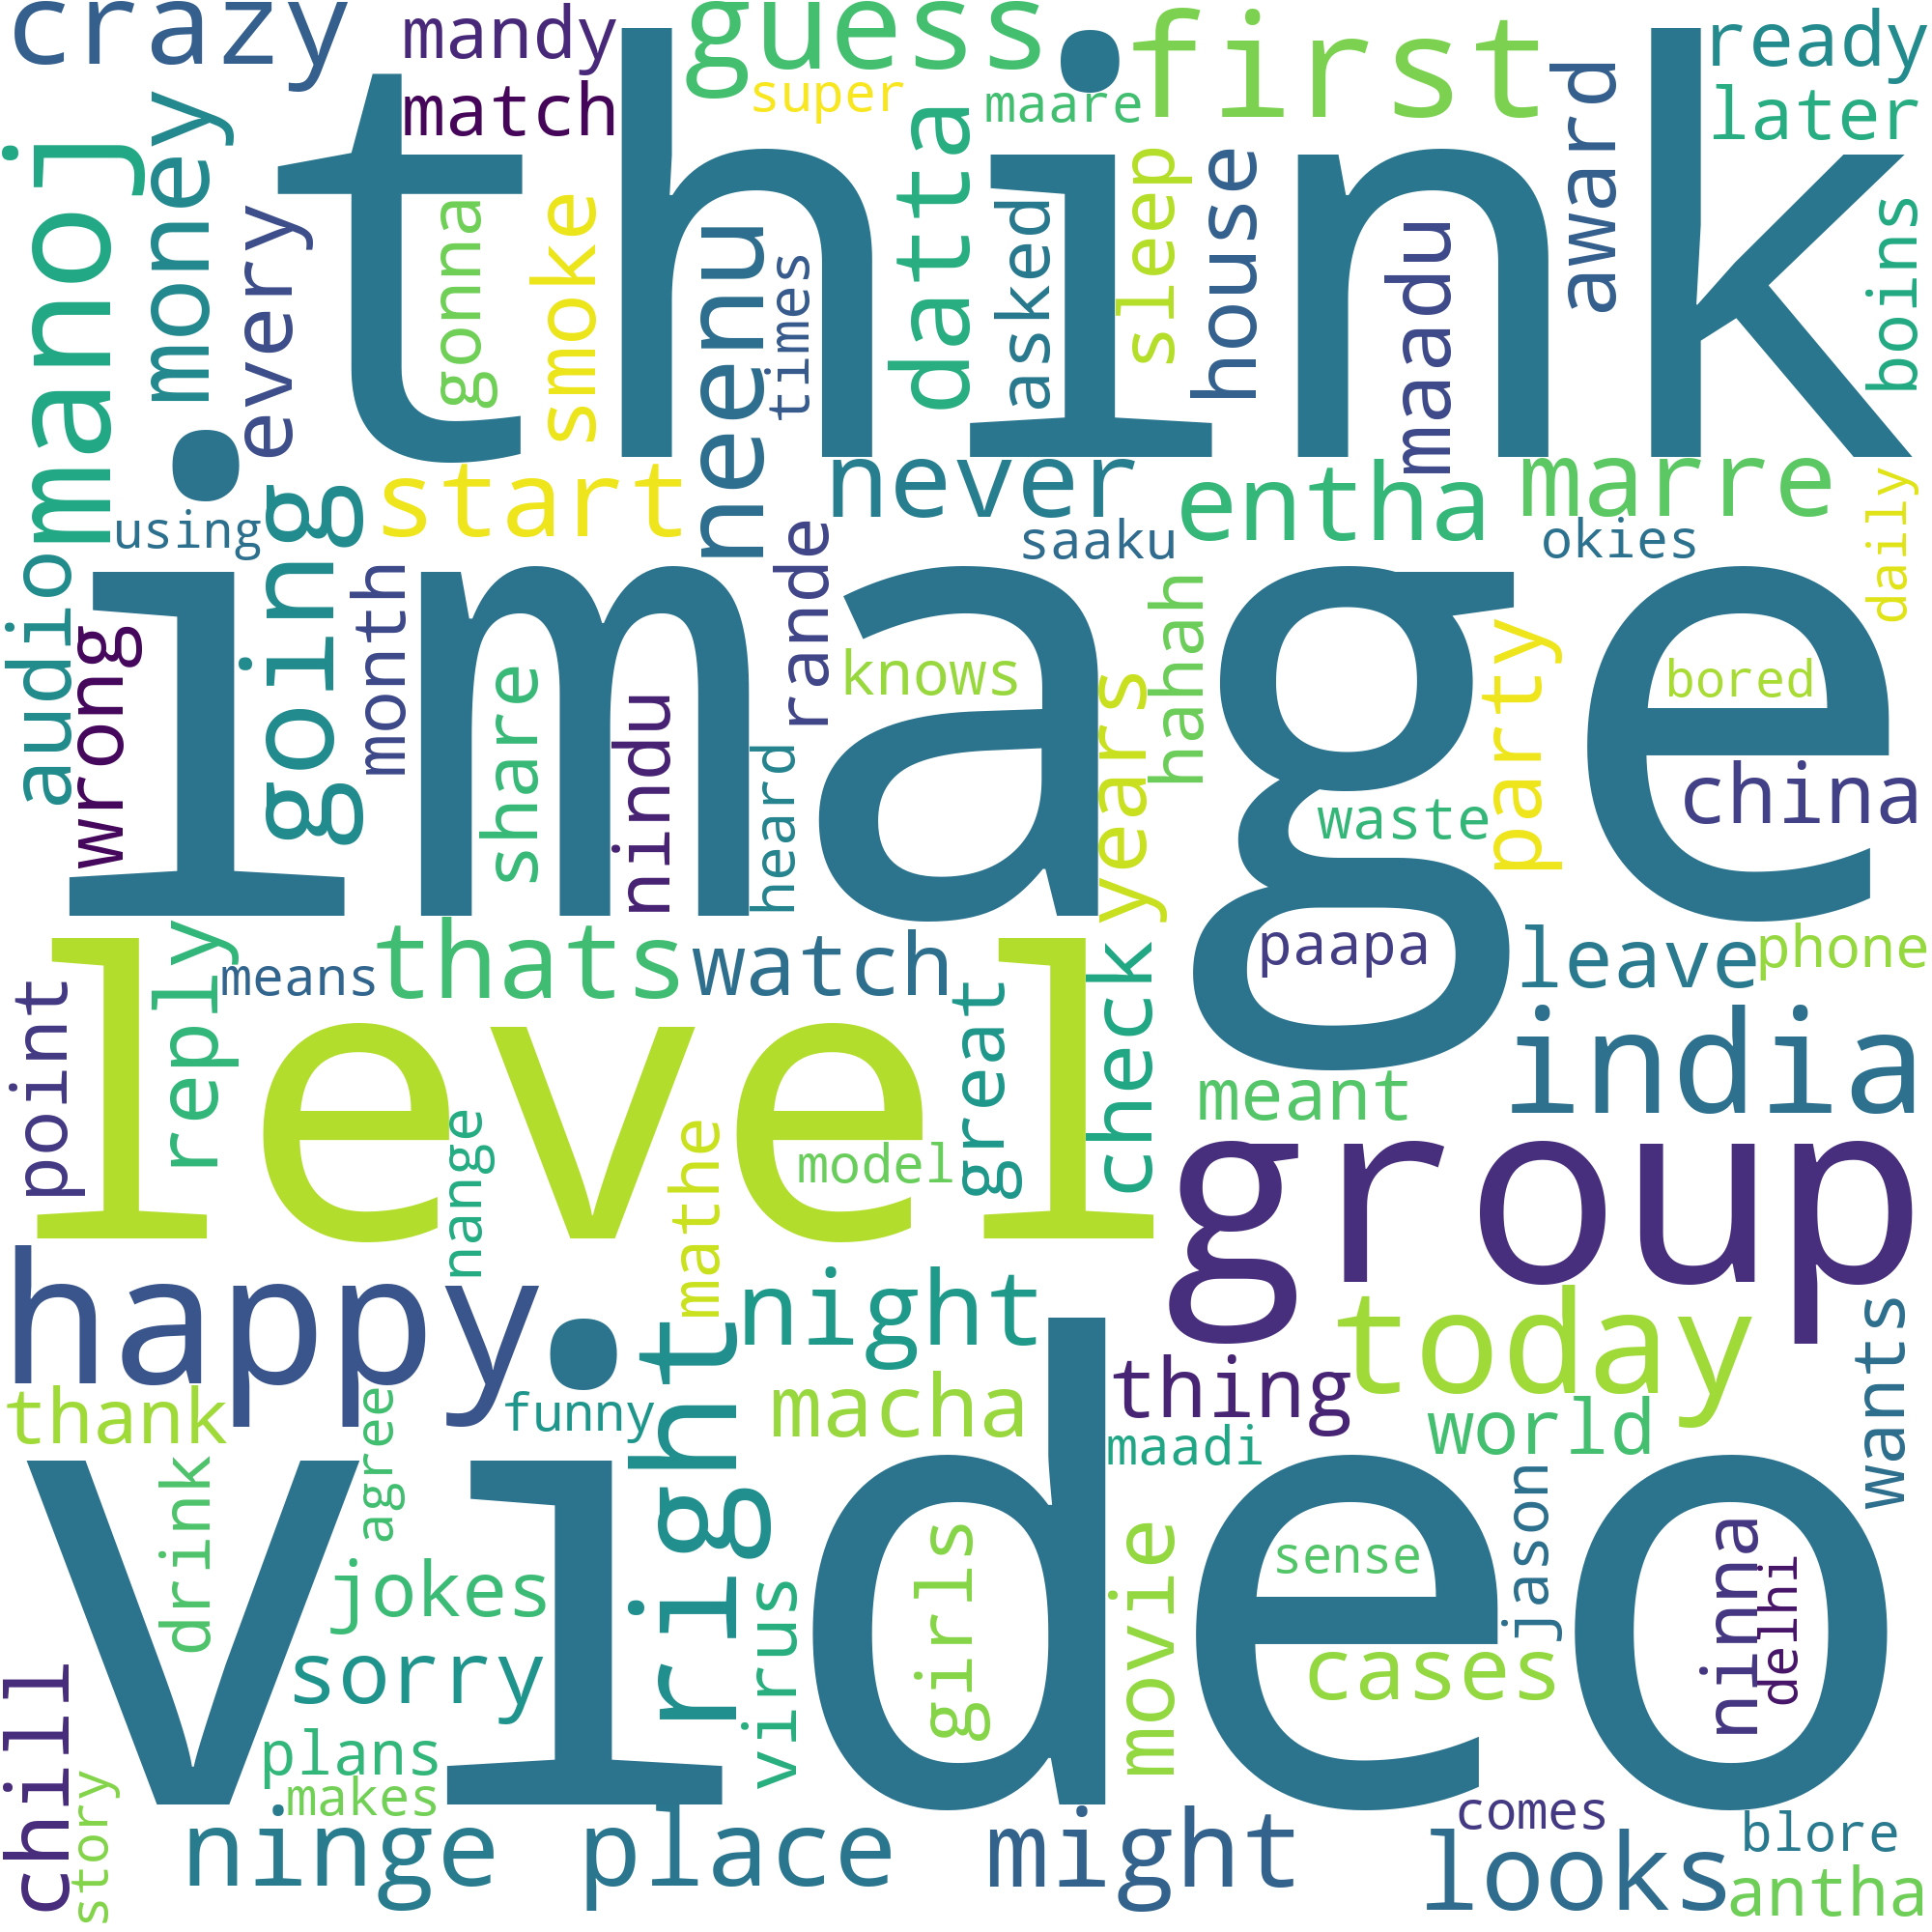

In [33]:
string = ' '.join(overall_selected_length_word_df.index)
wc=WordCloud(background_color="white", height=2000, width=2000, max_words=100).generate(string)

fig = go.Figure()
fig = make_subplots(rows=2, cols=2, start_cell="top-left" ,
            subplot_titles=("Group Subject Changes", "Group Icon Changes", "Group Exits","Top 100 words of minimum length "+str(selected_min_length)),
                   vertical_spacing = 0.09
                          )
fig.add_trace(
    go.Bar(y = df_subject.Authors , x= df_subject.Subject, name = "",orientation ='h',
       hovertemplate = 'Member = %{y}<br>'+ 
       'Total Subject Changes = %{x}<br>',
       text = df_subject.Subject , textposition = 'outside'),
row=1,col=1
    )
fig.update_xaxes({**axis_style,**{'tick0': 0,'dtick': 10}},row=1, col=1)
fig.update_yaxes(axis_style,row=1, col=1)

fig.add_trace(
    go.Bar(y = df_icon.Authors , x= df_icon.Icon, name = "", orientation ='h',
       hovertemplate = 'Member = %{y}<br>'+ 
       'Total Icon Changes = %{x}<br>',
       text = df_icon.Icon , textposition = 'outside',),
row=1,col=2
    )
fig.update_xaxes({**axis_style,**{'tick0': 0,'dtick': 10}}, row=1, col=2)
fig.update_yaxes(axis_style, row=1, col=2)

fig.add_trace(
    go.Bar(x = df_exits.index , y= df_exits.Left , name = "", #orientation ='h',
       hovertemplate = 'Member = %{x}<br>'+ 
       'Total Exits = %{y}<br>',
       text = df_exits.Left , textposition = 'outside' ),
row=2,col=1
    )
fig.update_xaxes(axis_style, row=2, col=1)
fig.update_yaxes({**axis_style,**{'tick0': 0,'dtick': 1}}, row=2, col=1)


# figure for word cloud
wc_img = wc.to_image()
with BytesIO() as buffer:
    wc_img.save(buffer, 'png')
    img2 = base64.b64encode(buffer.getvalue()).decode()

img_width = 1000
img_height = 800
scale_factor = 0.5

# Add invisible scatter trace.
# This trace is added to help the autoresize logic work.
fig.add_trace(
    go.Scatter(
        x=[0, img_width * scale_factor],
        y=[0, img_height * scale_factor],
        mode="markers",
        marker_opacity=0
    ), row=2, col=2
)

# Configure axes
fig.update_xaxes(visible=False, range=[0, img_width * scale_factor], row =2, col=2)

fig.update_yaxes(visible=False, range=[0, img_height * scale_factor],scaleanchor="x", row =2, col=2) # the scaleanchor attribute ensures that the aspect ratio stays constant
# Add image
fig.add_layout_image(
    dict(
        x=0,
        sizex=img_width * scale_factor,
        y=img_height * scale_factor,
        sizey=img_height * scale_factor,
        xref="x",
        yref="y",
        opacity=1.0,
        layer="below",
        sizing="stretch",
        source=wc_img
    ), row=2, col=2
)


fig.update_layout ( 
    height=1300 , width=1600, 
    hoverlabel = hover_label_style,
    title_text='Group Activity',
    yaxis = axis_style,
    margin= margin_style,
    plot_bgcolor='white',
    showlegend=False
    
)

#pyo.plot(fig, filename = 'group_activity.html')

#### Code to convert ravindra iphone group chat to android analyis

'''
remember to remove all the sticker, image etc ommited to media omitted

pat = "^((\[)([0-2][0-9]|[3][0-1])\/([0][1-9]|[1][0-2])(\/)([0-2][0-9]), (([0-9]:[0-5][0-9]:[0-5][0-9]) (AM|PM)|([1][0-2]:[0-5][0-9]:[0-5][0-9]) (AM|PM))(\]))"
wr = open("Manali Group.txt", "w",  encoding="utf-8")
with open("IphoneManaliGroup.txt" , encoding="utf-8") as read:
    while True:
        x = read.readline()
        if not x:
            break
        
        if (re.match(pat,x)) or x.endswith('omitted\n'):
            ls = x.replace('\u200e','').strip().split(']',1)
            #print(ls)
            wr.write(ls[0][1:-6]+ls[0][-3:].lower()+' -'+ls[1]+"\n")
        else:
            wr.write(x.replace('\u200e','').strip()+'\n')
wr.close()
'''